In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hddCRP.dataLoader as dl
from scipy.stats import mannwhitneyu
results_directory = "Results/populationNew2/"

In [2]:
def plot_population_fit(grps = ["uniform_H", "uniform_T", "diverse_TH", "diverse_HT"], prefix = ''):
    fit_file = f"{results_directory}/{prefix}fit"
    fit_file += f".pkl"

    data_fits = pd.read_pickle(fit_file)

    # data_fits["alpha.3"] = 0
    df = data_fits.loc[:,["group", "timeconstant", "subject_similarity", "context_a_depth_1", "context_b_depth_1",
                    "alpha.1", "alpha.2", "alpha.3"]]


    df["alpha_0"] = df.loc[:,"alpha.1"] + df.loc[:,"alpha.2"] + df.loc[:,"alpha.3"]
    df["p_left_base"] = df.loc[:,"alpha.1"]/df.loc[:,"alpha_0"]
    df["p_straight_base"] = df.loc[:,"alpha.2"]/df.loc[:,"alpha_0"]
    df["p_right_base"] = df.loc[:,"alpha.3"]/df.loc[:,"alpha_0"]

    # grps = ["uniform_H", "uniform_T"]
    # grps = ["diverse_TH", "diverse_HT"]
    # grps = ["uniform_H", "uniform_T", "diverse_TH", "diverse_HT"]
    # grps = ["uniform_H", "uniform_T", "uniform"]
    # grps = ["diverse_TH", "diverse_HT", "diverse"]
    # grps = ["uniform", "diverse"]
    # grps = ["uniform_H", "uniform_T", "diverse"]
    df = df.query("group in @grps")

    NR = 4;
    NC = 3;
    plt.figure(figsize=(NC*6,NR*5))
    plt.subplot(NR,NC,1)
    sns.histplot(df, x="timeconstant", hue="group")
    plt.subplot(NR,NC,2)
    sns.histplot(df, x="subject_similarity", hue="group")
    plt.subplot(NR,NC,3)
    sns.histplot(df, x="alpha_0", hue="group")


    plt.subplot(NR,NC,4)
    sns.histplot(df, x="context_a_depth_1", hue="group")
    plt.subplot(NR,NC,5)
    sns.histplot(df, x="context_b_depth_1", hue="group")
    plt.subplot(NR,NC,6)
    sns.scatterplot(df, x="context_a_depth_1", y="context_b_depth_1", hue="group", s=1.5)


    # plt.subplot(NR,NC,7)
    # sns.histplot(df, x="alpha.1", hue="group")
    # plt.subplot(NR,NC,8)
    # sns.histplot(df, x="alpha.2", hue="group")
    # plt.subplot(NR,NC,9)
    # sns.histplot(df, x="alpha.3", hue="group")


    plt.subplot(NR,NC,7)
    sns.histplot(df, x="p_left_base", hue="group")
    plt.subplot(NR,NC,8)
    sns.histplot(df, x="p_right_base", hue="group")
    plt.subplot(NR,NC,9)
    sns.histplot(df, x="p_straight_base", hue="group")


    plt.subplot(NR,NC,10)
    # sns.histplot(df, x="p_left_base", hue="group")
    sns.scatterplot(df, x="p_left_base", y="p_right_base", hue="group", s=1.5)
    plt.plot([0,1],[1,0],'k:')
    plt.plot([0,2/3],[2/3,0],'k:')
    plt.plot([0,1/3],[1/3,0],'k:')
    plt.subplot(NR,NC,11)
    # sns.histplot(df, x="p_right_base", hue="group")
    sns.scatterplot(df, x="p_straight_base", y="p_right_base", hue="group", s=1.5)
    plt.plot([0,1],[1,0],'k:')
    plt.plot([0,2/3],[2/3,0],'k:')
    plt.plot([0,1/3],[1/3,0],'k:')
    plt.subplot(NR,NC,12)
    # sns.histplot(df, x="p_straight_base", hue="group")
    sns.scatterplot(df, x="p_left_base", y="p_straight_base", hue="group", s=1.5)
    plt.plot([0,1],[1,0],'k:')
    plt.plot([0,2/3],[2/3,0],'k:')
    plt.plot([0,1/3],[1/3,0],'k:')

# from sklearn.metrics import roc_auc_score

# param = "context_a_depth_1";
# x = data_fits[param][data_fits["group"] == "diverse"]
# y = data_fits[param][data_fits["group"] == "uniform"]

# print((x < 0.5).mean())
# print((y < 0.5).mean())
# print(x.median())
# print(y.median())

# roc_auc_score(np.concatenate([np.zeros_like(x), np.ones_like(y)]), np.concatenate([x,y]))

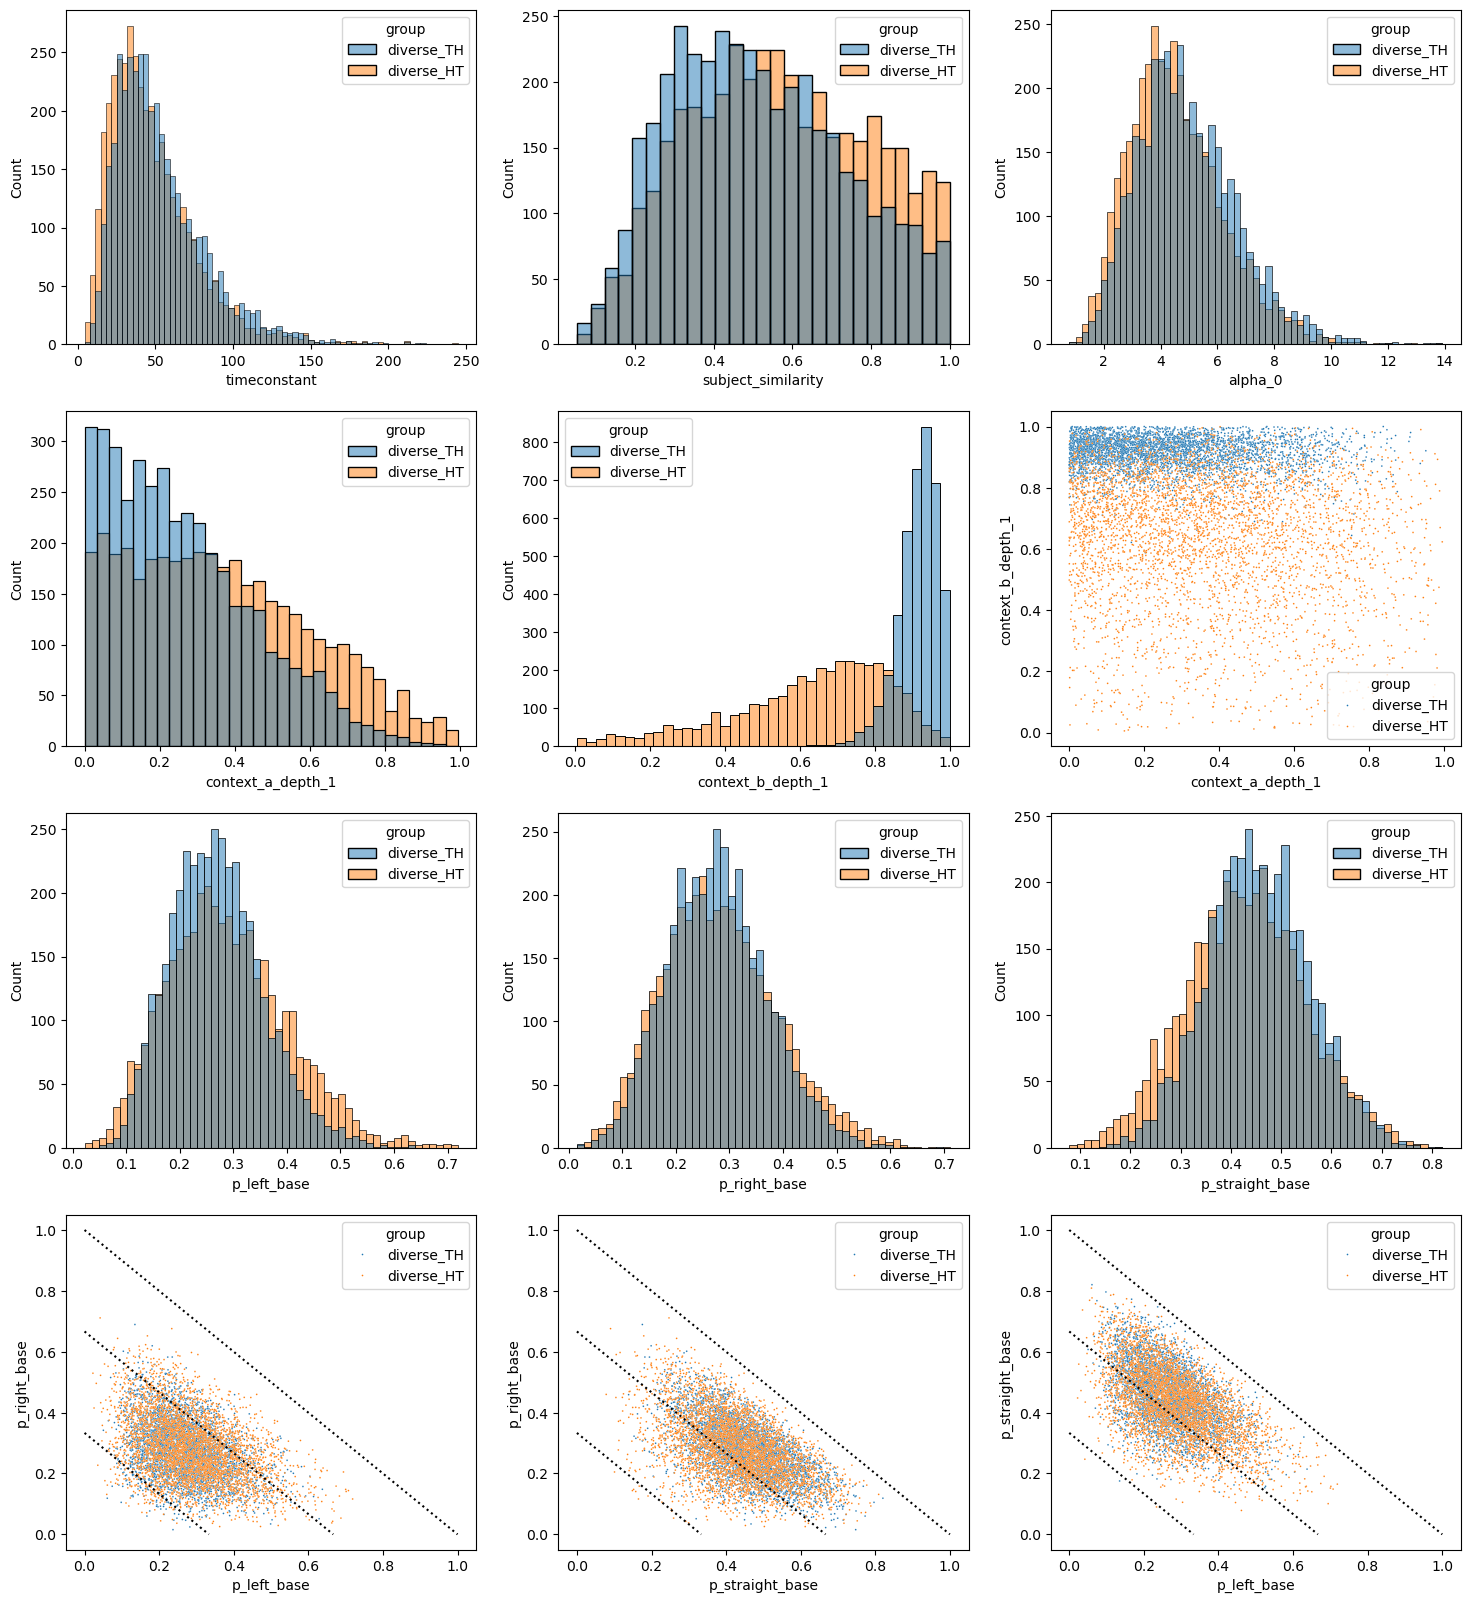

In [3]:
plot_population_fit()

TypeError: 'NoneType' object is not iterable

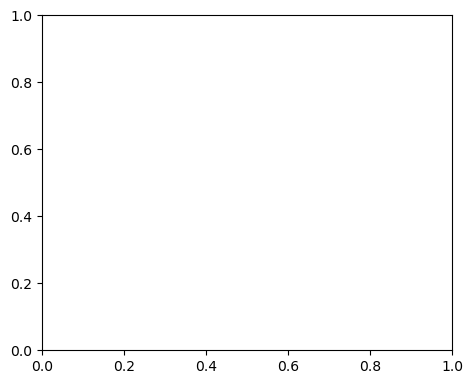

In [4]:
plot_population_fit(grps=["uniform", "diverse"])

In [ ]:
plot_population_fit(prefix="last_")

In [ ]:
def plot_individual_fits(prefix="indiv2_"):

    fit_file = f"{results_directory}/{prefix}fit"
    fit_file += f".pkl"
    summary_fit_file = f"{results_directory}/{prefix}fit_summary"
    summary_fit_file += f".pkl"

    data_fits = pd.read_pickle(fit_file)
    summary_fits = pd.read_pickle(summary_fit_file)

    # data_fits["alpha_0"] = data_fits["alpha.1"] + data_fits["alpha.2"] + data_fits["alpha.3"]
    # data_fits["p_left_base"] = data_fits["alpha.1"]/data_fits["alpha_0"]
    # data_fits["p_straight_base"] = data_fits["alpha.2"]/data_fits["alpha_0"]
    # data_fits["p_right_base"] = data_fits["alpha.3"]/data_fits["alpha_0"]


    # post_median = data_fits[["alpha_0", "p_left_base", "p_straight_base", "p_right_base", "subject"]].groupby("subject", as_index=False).median()
    # post_mean = data_fits[["alpha_0", "p_left_base", "p_straight_base", "p_right_base", "subject"]].groupby("subject", as_index=False).mean()

    # post_median["group"] = post_median["subject"].map(lambda x : dl.get_group(x, full=( subgroups)))
    # post_mean["group"] = post_mean["subject"].map(lambda x : dl.get_group(x, full=( subgroups)))

    summary_fits["group"] = summary_fits["subject"].map(lambda x : dl.get_group(x, full=( False)))
    summary_fits["subgroup"] = summary_fits["subject"].map(lambda x : dl.get_group(x, full=( True)))


    NR = 2;
    NC = 2;
    plt.figure(figsize=(NC*6,NR*5))

    fig_num = 1;
    for ii, pp in enumerate(["context_a_depth_1", "context_b_depth_1"]):
        plt.subplot(NR,NC,fig_num)
        sns.swarmplot(summary_fits.loc[pp], x="group", y="mean", hue="subgroup", legend=(ii==0))
        plt.title(pp)
        plt.subplot(NR,NC,fig_num+NC)
        sns.swarmplot(summary_fits.loc[pp], x="group", y="median", hue="subgroup", legend=False)
        plt.title(pp)

        fig_num += 1
    return summary_fits


    

In [ ]:
sf = plot_individual_fits()

pp = "median"
sf_a  = sf.loc["context_a_depth_1",[pp, "group"]]
x_a = sf_a[pp][sf_a["group"] == "diverse"].values
y_a = sf_a[pp][sf_a["group"] == "uniform"].values
sf_b  = sf.loc["context_b_depth_1",[pp, "group"]]
x_b = sf_b[pp][sf_b["group"] == "diverse"].values
y_b = sf_b[pp][sf_b["group"] == "uniform"].values

print(f"mannwhitneyu p(context_a_depth_1) = {mannwhitneyu(x_a,y_a).pvalue}")
print(f"mannwhitneyu p(context_b_depth_1) = {mannwhitneyu(x_b,y_b).pvalue}")